<a href="https://colab.research.google.com/github/gouthami2309/SchoolDropout/blob/main/SchoolDropOut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

In [ ]:
data = pd.read_csv("dataset.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# New Section

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
data.rename(columns={'Nacionality':'Nationality','Age at enrollment':'Age'}, inplace=True)

In [ ]:
data.isnull().sum()/len(data)*100

Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance                        0.0
Previous qualification                            0.0
Nationality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                                            0.0
Scholarship holder                                0.0
Age                                               0.0
International               

In [ ]:
print(data["Target"].unique())

['Dropout' 'Graduate' 'Enrolled']


In [ ]:
data['Target'] = data['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [ ]:
print(data['Target'].unique())

[0 2 1]


In [ ]:
data.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nationality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

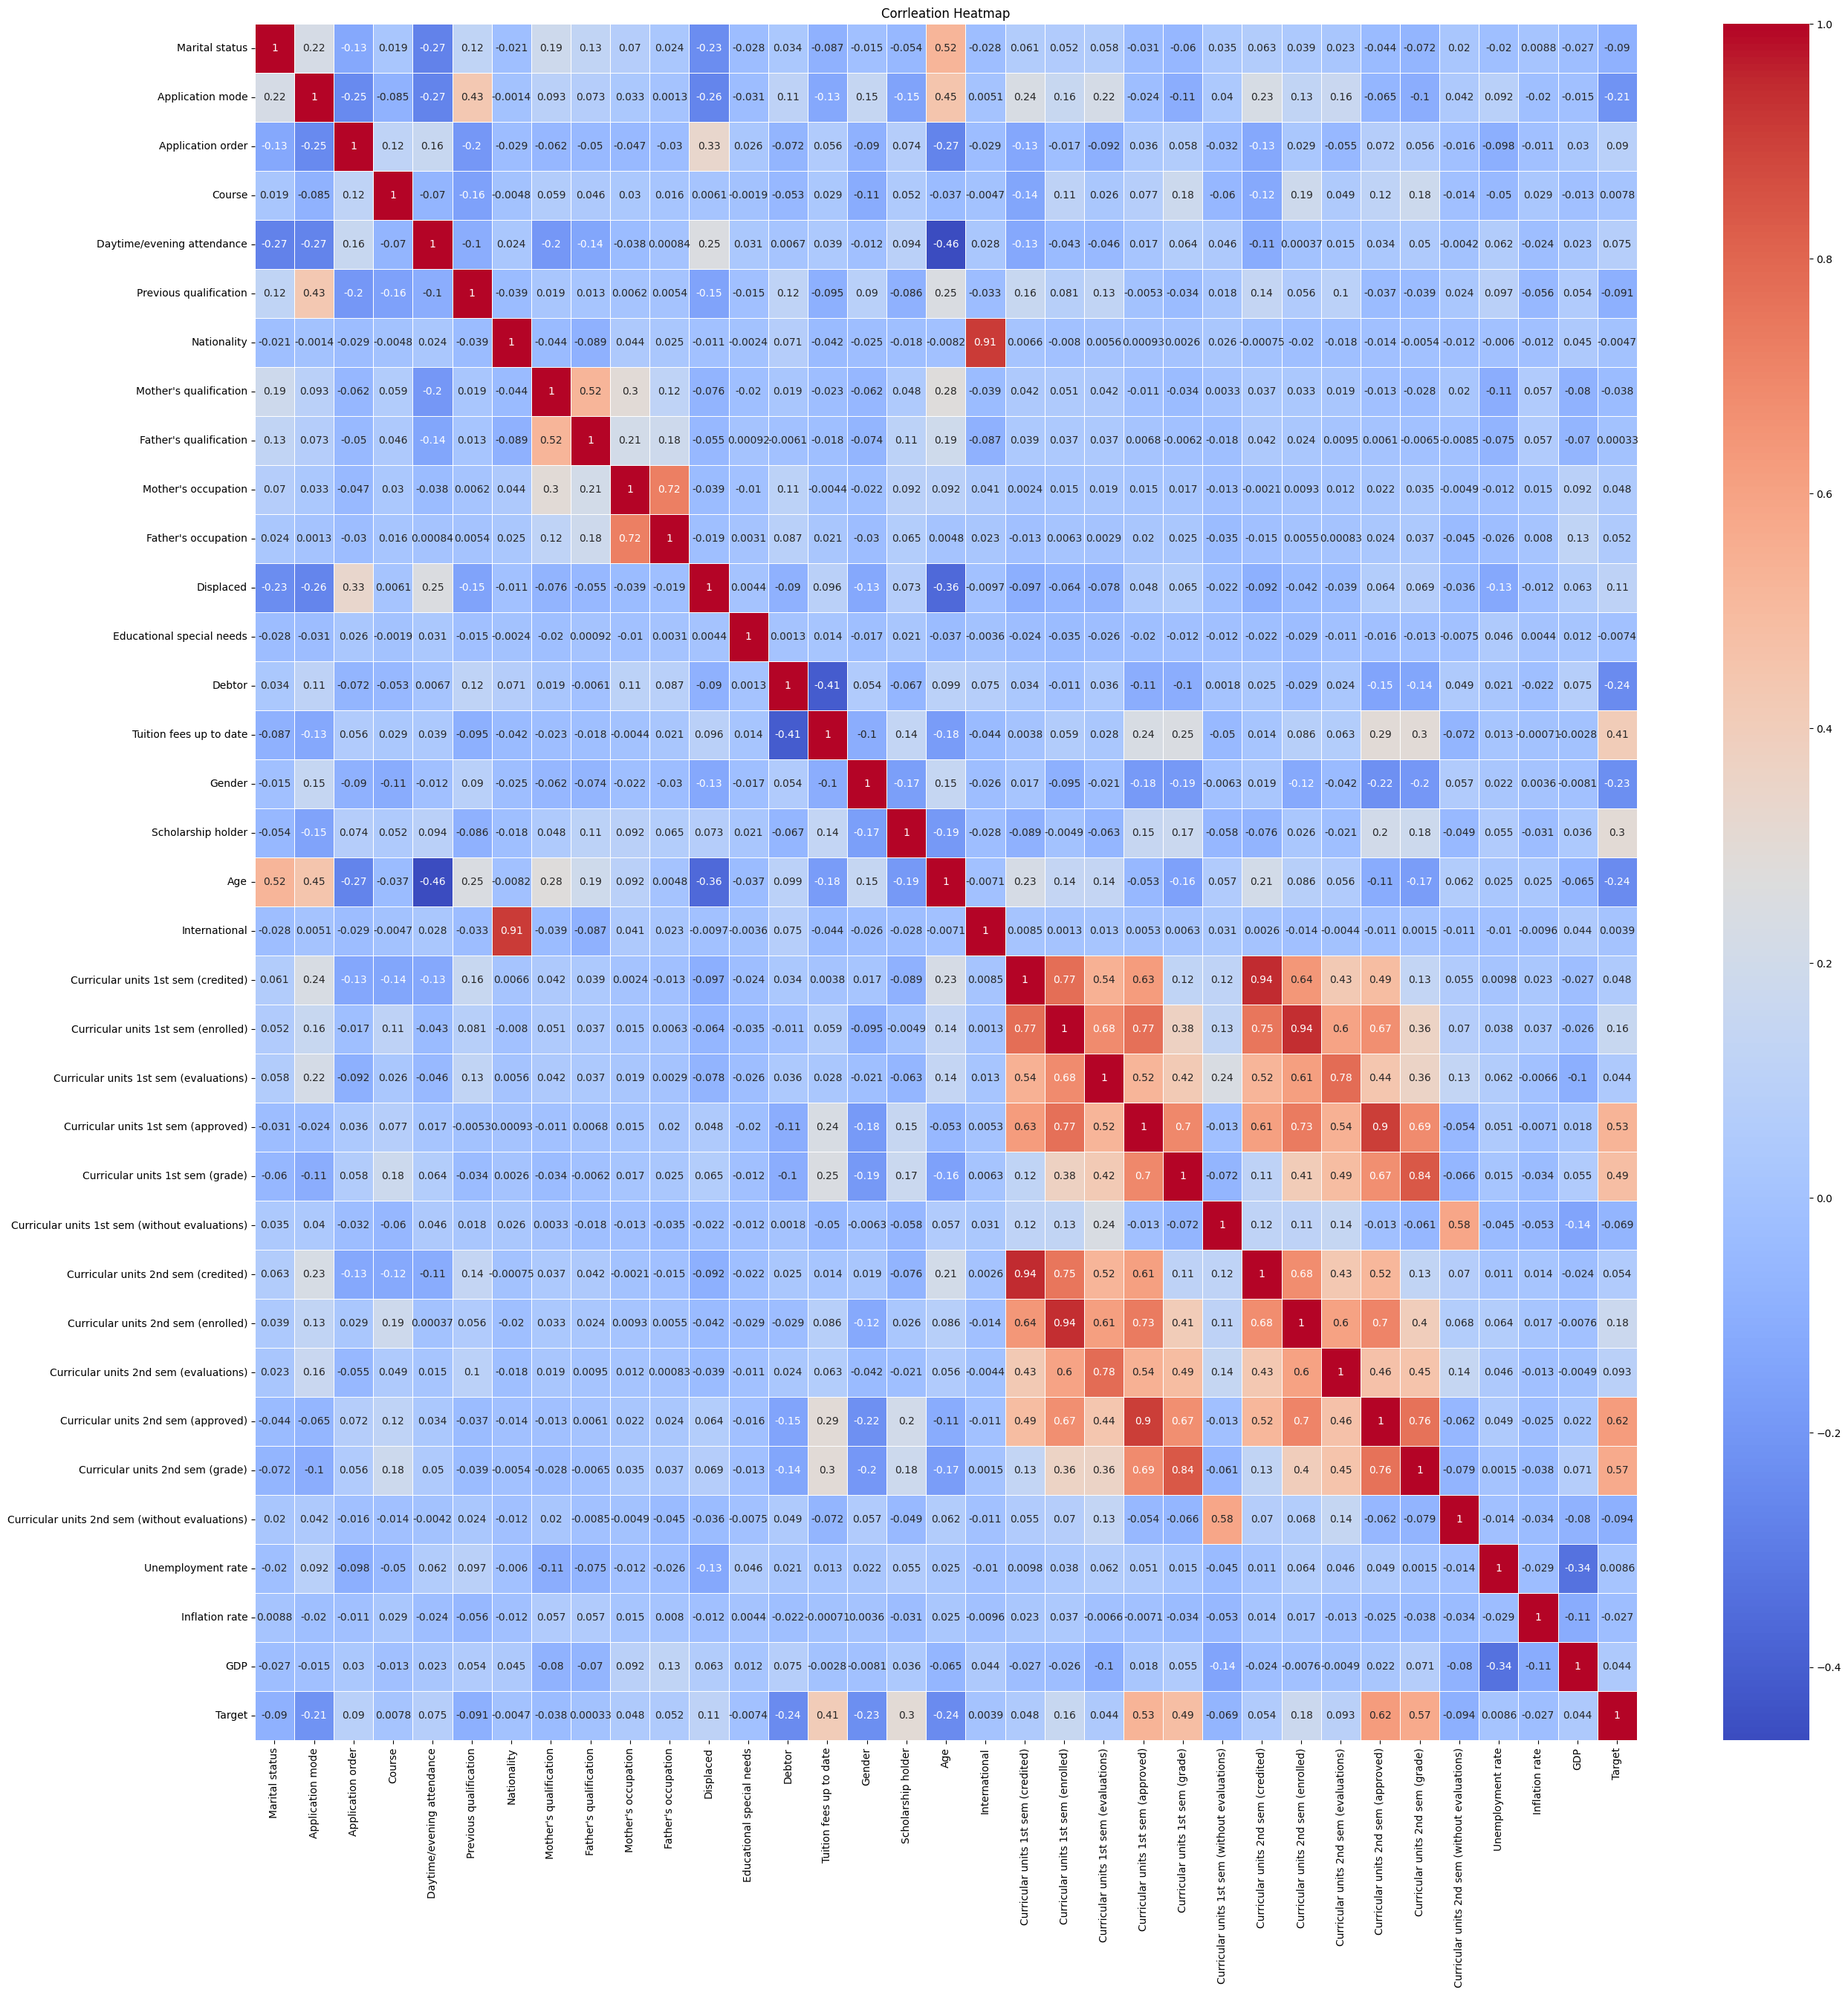

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot= True,cmap='coolwarm',linewidth=0.5)
plt.title('Corrleation Heatmap')
plt.show()

In [ ]:
new_data=data.copy()
new_data= new_data.drop(columns=['Nationality',
                                 'Mother\'s qualification',
                                 'Father\'s qualification',
                                 'Educational special needs',
                                 'International',
                                 'Curricular units 1st sem (without evaluations)',
                                  'Unemployment rate',
                                 'Inflation rate'], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Mother's occupation                             4424 non-null   int64  
 7   Father's occupation                             4424 non-null   int64  
 8   Displaced                                       4424 non-null   int64  
 9   Debtor                                   

In [ ]:
new_data['Target'].value_counts()

Target
2    2209
0    1421
1     794
Name: count, dtype: int64

In [ ]:
x=new_data['Target'].value_counts().index
y=new_data['Target'].value_counts().values

df = pd.DataFrame({
    'Target':x,
    'Count_T':y
})

fig = px.pie(df,
             names = 'Target',
             values = 'Count_T',
             title = 'How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()


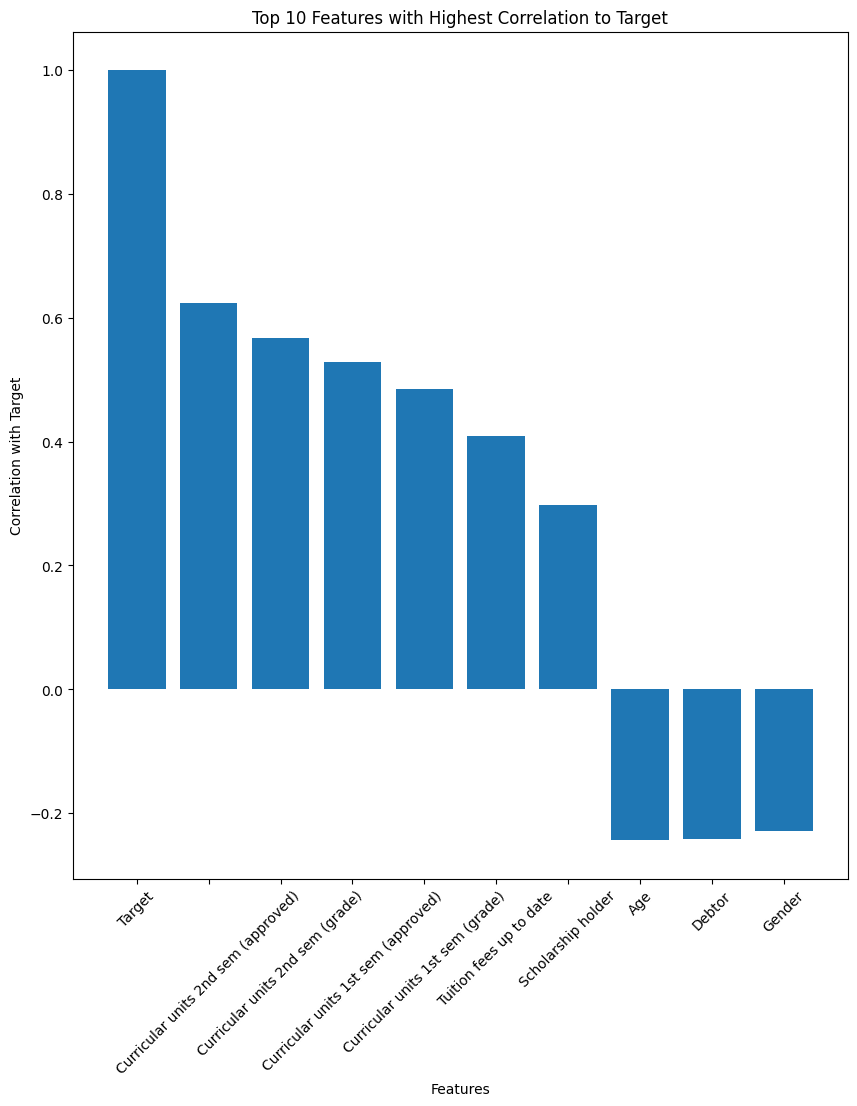

In [ ]:
correaltion = data.corr()['Target']
top_10_features= correaltion.abs().nlargest(10).index
top_10_corr_values =correaltion[top_10_features]

plt.figure(figsize=(10, 11))
plt.bar(top_10_features,top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Top 10 Features with Highest Correlation to Target')
plt.xticks(rotation=45)
plt.show()

In [ ]:
px.histogram(new_data['Age'],x='Age',color_discrete_sequence= ['lightblue'])

In [ ]:
X= new_data.drop('Target',axis= 1)
y = new_data['Target']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
dtree = DecisionTreeClassifier(random_state=0)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Simulate some data
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', periods=36, freq='M')
data = {
    'Date': dates,
    'Revenue': np.random.randint(1000, 5000, size=36),
    'Inflation_Rate': np.random.uniform(1.0, 5.0, size=36)  # Example feature
}
df = pd.DataFrame(data)

# Features and target variable
X = df[['Inflation_Rate']]  # Feature(s)
y = df['Revenue']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 826.07
R-squared (R²): -0.05


         X1         X2         X3          y
0  3.745401   0.628584  19.260949  31.982180
1  9.507143  12.728208   2.524199  53.244043
2  7.319939   6.287120   4.848861  50.102639
3  5.986585  10.171414  26.956626  68.428803
4  1.560186  18.151329  18.192872  49.050377
R-squared: 0.8741386274519103
Adjusted R-squared: 0.8505396200991435
MAE: 5.344417607547093
RMSE: 7.248412862820868


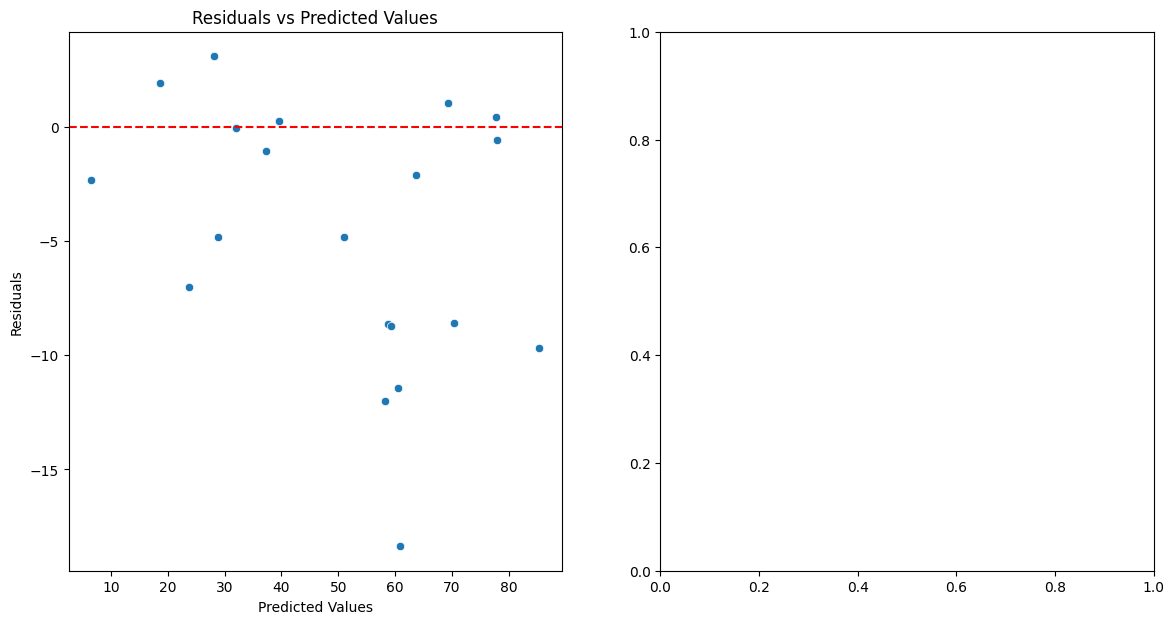

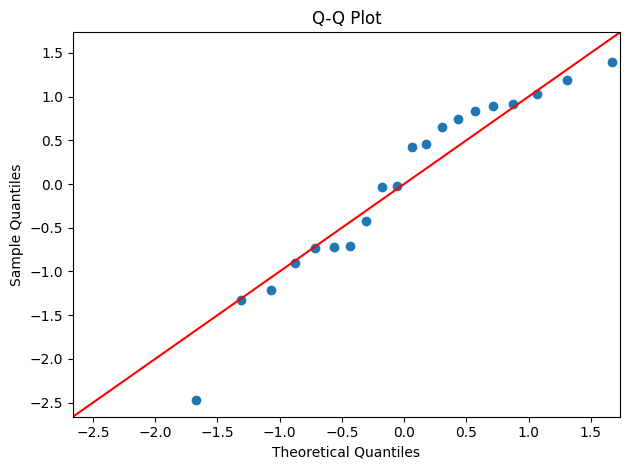

  feature       VIF
0      X1  1.003025
1      X2  1.023526
2      X3  1.023792


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generating a synthetic dataset
np.random.seed(42)
num_samples = 100

# Independent variables
X1 = np.random.rand(num_samples) * 10
X2 = np.random.rand(num_samples) * 20
X3 = np.random.rand(num_samples) * 30

# Dependent variable with some added noise
y = 3 * X1 + 2 * X2 + X3 + np.random.randn(num_samples) * 5

# Creating a DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})
print(data.head())

# Splitting the data into training and testing sets
X = data[['X1', 'X2', 'X3']]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on test data
y_pred = model.predict(X_test)

# Calculating metrics
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Residual analysis
residuals = y_test - y_pred

plt.figure(figsize=(14, 7))

# Residuals vs Predicted Values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# Q-Q Plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

# Checking for Multicollinearity
# Adding a constant to the model for VIF calculation
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(1, X_with_const.shape[1])]

print(vif_data)
